# **ResNet50 with data augmentation**

# Import

In [1]:
#utils
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import zipfile
from shutil import copyfile
from time import time

from google.colab import drive
from IPython.display import Image

from glob import glob

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Settings for prettier visualization in Google Colab
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [2]:
drive.mount('/content/gdrive')

<IPython.core.display.Javascript object>

Mounted at /content/gdrive


In [3]:
cartella = 'data_puliti'

<IPython.core.display.Javascript object>

In [4]:
copyfile(f'gdrive/MyDrive/FDL 22/{cartella}/TRAIN.zip', 'tr_val.zip') 

<IPython.core.display.Javascript object>

'tr_val.zip'

In [5]:
zip = zipfile.ZipFile('tr_val.zip')
zip.extractall()
zip.close()

<IPython.core.display.Javascript object>

In [6]:
base_path = 'TRAIN/'
num_classes = 5

<IPython.core.display.Javascript object>

In [7]:
copyfile(f'gdrive/MyDrive/FDL 22/{cartella}/TEST.zip', 'test.zip')

<IPython.core.display.Javascript object>

'test.zip'

In [8]:
zip = zipfile.ZipFile('test.zip')
zip.extractall()
zip.close()

<IPython.core.display.Javascript object>

# Train validation split

In [18]:
# Training set
train_set = keras.preprocessing.image_dataset_from_directory(base_path,
                                                 image_size=(224,224),
                                                 batch_size = 32,
                                                 label_mode='categorical',
                                                 subset='training',
                                                 validation_split=0.22,
                                                 shuffle=True,
                                                 seed=1)

<IPython.core.display.Javascript object>

Found 3237 files belonging to 5 classes.
Using 2525 files for training.


In [ ]:
# Validation set
val_set = keras.preprocessing.image_dataset_from_directory(base_path,
                                                 image_size=(224,224),
                                                 batch_size = 32,
                                                 label_mode='categorical',
                                                 subset='validation',
                                                 validation_split=0.22,
                                                 shuffle=True,
                                                 seed=1)

<IPython.core.display.Javascript object>

Found 3237 files belonging to 5 classes.
Using 712 files for validation.


In [ ]:
classes = train_set.class_names
classes

<IPython.core.display.Javascript object>

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Data augmentation

In [ ]:
data_augmentation1 = keras.Sequential()
data_augmentation1.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal"))

data_augmentation2 = keras.Sequential()
data_augmentation2.add(keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0.2, fill_mode='constant'))

data_augmentation3 = keras.Sequential()
data_augmentation3.add(keras.layers.experimental.preprocessing.RandomZoom(0.2))

data_augmentation4 = keras.Sequential()
data_augmentation4.add(keras.layers.experimental.preprocessing.RandomContrast(0.3))

<IPython.core.display.Javascript object>

In [ ]:
aug_set1 = train_set.map(lambda x, y: (data_augmentation1(x, training = True), y))
aug_set2 = train_set.map(lambda x, y: (data_augmentation2(x, training = True), y))
aug_set3 = train_set.map(lambda x, y: (data_augmentation3(x, training = True), y))
aug_set4 = train_set.map(lambda x, y: (data_augmentation4(x, training = True), y))

<IPython.core.display.Javascript object>

## Examples

<IPython.core.display.Javascript object>

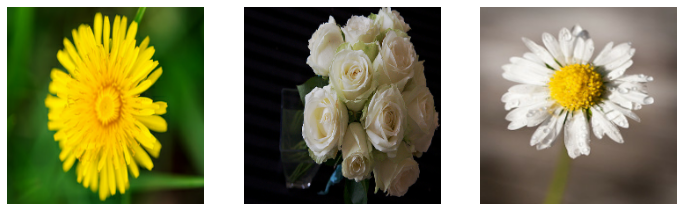

In [ ]:
# flip
for images, labels in aug_set1.take(1):
  plt.figure(figsize=(12, 12));
  for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    first_image = images[i]
    plt.imshow(first_image.numpy().astype("int32"))
    plt.axis("off")

<IPython.core.display.Javascript object>

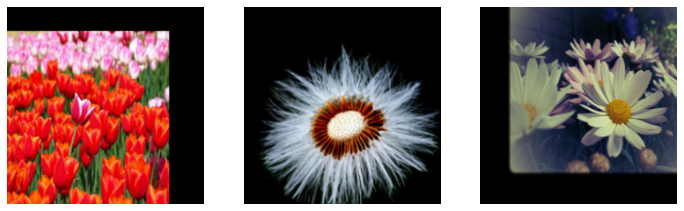

In [ ]:
# translation
for images, labels in aug_set2.take(1):
  plt.figure(figsize=(12, 12));
  for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    first_image = images[i]
    plt.imshow(first_image.numpy().astype("int32"))
    plt.axis("off")

<IPython.core.display.Javascript object>

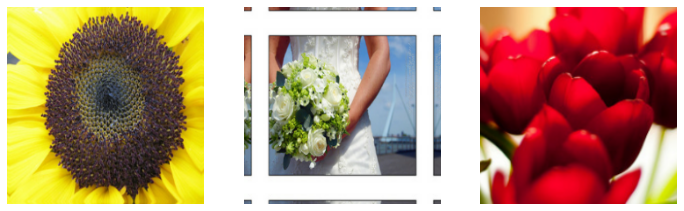

In [ ]:
# zoom
for images, labels in aug_set3.take(1):
  plt.figure(figsize=(12, 12));
  for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    first_image = images[i]
    plt.imshow(first_image.numpy().astype("int32"))
    plt.axis("off")

<IPython.core.display.Javascript object>

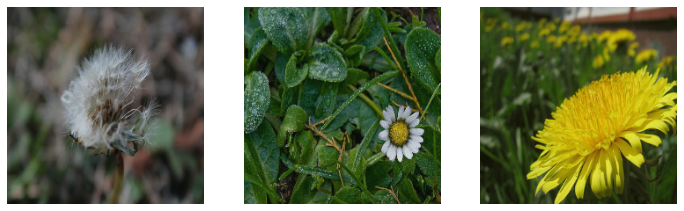

In [ ]:
# contrast
for images, labels in aug_set4.take(1):
  plt.figure(figsize=(12, 12));
  for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    first_image = images[i]
    plt.imshow(first_image.numpy().astype("int32"))
    plt.axis("off")

### Unione

In [ ]:
train_set_aug = train_set.concatenate(aug_set1)
train_set_aug = train_set_aug.concatenate(aug_set2)
train_set_aug = train_set_aug.concatenate(aug_set3)
train_set_aug = train_set_aug.concatenate(aug_set4)

<IPython.core.display.Javascript object>

In [ ]:
train_set_aug = train_set_aug.shuffle(1)

<IPython.core.display.Javascript object>

# Model

In [ ]:
# Modello base
resnet = keras.applications.resnet50.ResNet50(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    include_top=False)

<IPython.core.display.Javascript object>

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet.trainable = False

<IPython.core.display.Javascript object>

In [ ]:
resnet.summary()

<IPython.core.display.Javascript object>

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))

x = keras.applications.resnet50.preprocess_input(inputs) 
x = resnet(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(50, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
model.summary()

<IPython.core.display.Javascript object>

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                           

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

<IPython.core.display.Javascript object>

In [ ]:
history = model.fit(train_set_aug,
                    epochs=20,
                    validation_data=val_set,
                    callbacks=callback)

<IPython.core.display.Javascript object>

Epoch 1/20
395/395 [==============================] - 76s 185ms/step - loss: 1.8179 - accuracy: 0.7639 - val_loss: 0.8892 - val_accuracy: 0.9031
Epoch 2/20
395/395 [==============================] - 72s 181ms/step - loss: 0.7244 - accuracy: 0.9018 - val_loss: 0.6315 - val_accuracy: 0.9031
Epoch 3/20
395/395 [==============================] - 72s 181ms/step - loss: 0.5472 - accuracy: 0.9162 - val_loss: 0.5623 - val_accuracy: 0.9073
Epoch 4/20
395/395 [==============================] - 72s 181ms/step - loss: 0.4903 - accuracy: 0.9206 - val_loss: 0.5467 - val_accuracy: 0.8989
Epoch 5/20
395/395 [==============================] - 72s 182ms/step - loss: 0.4837 - accuracy: 0.9211 - val_loss: 0.5402 - val_accuracy: 0.9101
Epoch 6/20
395/395 [==============================] - 72s 181ms/step - loss: 0.4730 - accuracy: 0.9236 - val_loss: 0.5190 - val_accuracy: 0.9129
Epoch 7/20
395/395 [==============================] - 71s 180ms/step - loss: 0.4635 - accuracy: 0.9245 - val_loss: 0.5396 - val_ac

## Results

<IPython.core.display.Javascript object>

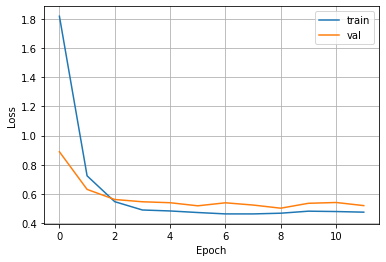

In [ ]:
# Visualizzo loss
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(['train', 'val']);
plt.grid();

<IPython.core.display.Javascript object>

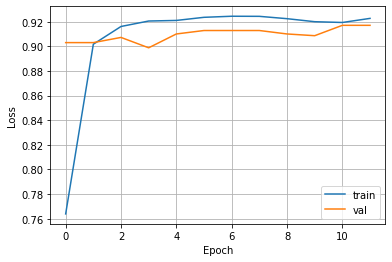

In [ ]:
# Visualizzo accuracy
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(['train', 'val']);
plt.grid();

## Test set

In [ ]:
test_set = keras.preprocessing.image_dataset_from_directory('TEST/',
                                                 image_size=(224,224),
                                                 batch_size = 32,
                                                 label_mode='categorical')

<IPython.core.display.Javascript object>

Found 360 files belonging to 5 classes.


In [ ]:
model.evaluate(test_set)

<IPython.core.display.Javascript object>

12/12 [==============================] - 2s 104ms/step - loss: 0.4543 - accuracy: 0.9306


[0.45431238412857056, 0.9305555820465088]

# Save model

In [ ]:
model.save('gdrive/MyDrive/FDL 22/resnet50_data_aug.h5', save_format='h5')

<IPython.core.display.Javascript object>

# Test

In [ ]:
model = keras.models.load_model('gdrive/MyDrive/FDL 22/resnet50_data_aug_V2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

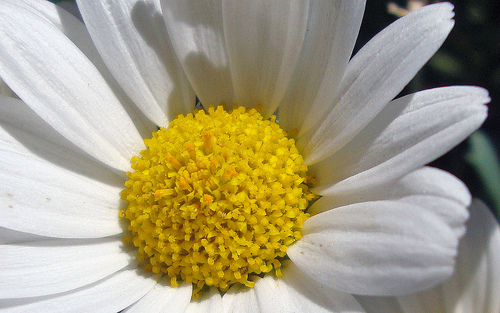

In [ ]:
# marghetita semplice
img_path ='TEST/daisy/10140303196_b88d3d6cec.jpg'
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'daisy'

In [ ]:
# probabilità per tutte le classi
y_probs*100

<IPython.core.display.Javascript object>

array([[9.8869278e+01, 5.3459668e-01, 9.2340380e-02, 1.3265476e-01,
        3.7113723e-01]], dtype=float32)

<IPython.core.display.Javascript object>

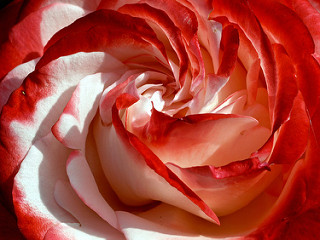

In [ ]:
# rosa semplice
img_path = 'TEST/roses/17449165090_dfb27af360_n.jpg'
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'roses'

In [ ]:
# probabilità per tutte le classi

y_probs*100

<IPython.core.display.Javascript object>

array([[1.6315385e-06, 6.5579222e-08, 9.9874840e+01, 3.8755265e-06,
        1.2515838e-01]], dtype=float32)

<IPython.core.display.Javascript object>

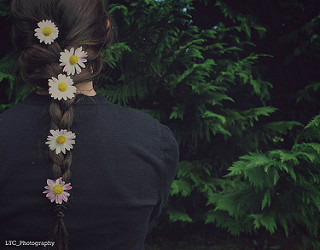

In [ ]:
# margherita ambigua
img_path = 'TEST/daisy/10172636503_21bededa75_n.jpg'
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'daisy'

In [ ]:
# probabilità per tutte le classi

y_probs*100

<IPython.core.display.Javascript object>

array([[88.22421  ,  2.1769528,  0.9837641,  7.3078947,  1.3071749]],
      dtype=float32)

<IPython.core.display.Javascript object>

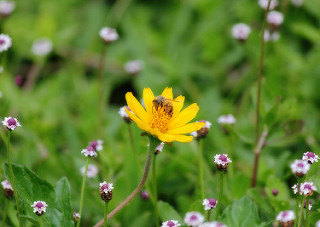

In [ ]:
# dente di leone ambiguo
img_path = 'TEST/dandelion/8716513637_2ba0c4e6cd_n.jpg'
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'daisy'

In [ ]:
# probabilità per tutte le classi

y_probs*100

<IPython.core.display.Javascript object>

array([[47.87089 , 31.061214,  3.937875, 10.137991,  6.992025]],
      dtype=float32)

# Confusion matrix

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_set:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

<IPython.core.display.Javascript object>

In [ ]:
predictions_class = []
for y in predictions:
  if y == 0:
    predictions_class.append(classes[0])
  elif y == 1:
    predictions_class.append(classes[1])
  elif y == 2:
    predictions_class.append(classes[2])
  elif y == 3:
    predictions_class.append(classes[3])
  else:
    predictions_class.append(classes[4])

labels_class = []
for y in labels:
  if y == 0:
    labels_class.append(classes[0])
  elif y == 1:
    labels_class.append(classes[1])
  elif y == 2:
    labels_class.append(classes[2])
  elif y == 3:
    labels_class.append(classes[3])
  else:
    labels_class.append(classes[4])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

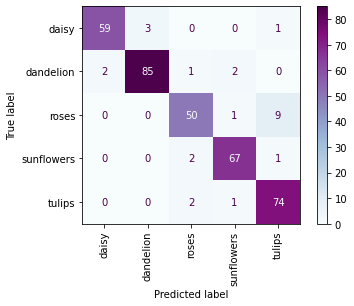

In [ ]:
ConfusionMatrixDisplay.from_predictions(labels_class, predictions_class, cmap='BuPu', xticks_rotation='vertical');

# Classification report

In [ ]:
print(classification_report(labels_class, predictions_class))

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

       daisy       0.97      0.94      0.95        63
   dandelion       0.97      0.94      0.96        90
       roses       0.91      0.83      0.87        60
  sunflowers       0.94      0.96      0.95        70
      tulips       0.87      0.96      0.91        77

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

